In [1]:
# !pip install pycaret

In [2]:
import pandas as pd
import seaborn as sns

from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("new_train_v5.csv")
train = train.drop('index', axis=1)

In [4]:
counts = train['Consumer_type'].value_counts()
print(counts)

rural domestic         203771
rural commercial       203542
domestic               203531
construction           200993
low income families    200485
rural expansion        200300
industrial             196681
Name: Consumer_type, dtype: int64


In [5]:
test = pd.read_csv("test_v5.csv")

In [6]:
train.shape

(1409303, 6)

In [7]:
counts = train['Consumer_type'].value_counts()
print(counts)

rural domestic         203771
rural commercial       203542
domestic               203531
construction           200993
low income families    200485
rural expansion        200300
industrial             196681
Name: Consumer_type, dtype: int64


In [8]:
train = train.sample(frac=1, random_state=42).reset_index(drop=True)
test = test.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
test.shape

(3500, 6)

In [10]:
counts = test['Consumer_type'].value_counts()
print(counts)

rural commercial       500
low income families    500
domestic               500
industrial             500
rural expansion        500
construction           500
rural domestic         500
Name: Consumer_type, dtype: int64


In [11]:
# clf1 = setup(train, target='Consumer_type', use_gpu=True)
clf1 = setup(train, target='Consumer_type')

best_model = compare_models()

,Description,Value
0,Session id,4246
1,Target,Consumer_type
2,Target type,Multiclass
3,Target mapping,"construction: 0, domestic: 1, industrial: 2, low income families: 3, rural commercial: 4, rural domestic: 5, rural expansion: 6"
4,Original data shape,"(1409303, 6)"
5,Transformed data shape,"(1409303, 6)"
6,Transformed train set shape,"(986512, 6)"
7,Transformed test set shape,"(422791, 6)"
8,Numeric features,3
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9560,0.9975,0.9560,0.9560,0.9560,0.9487,0.9487,168.5650
xgboost,Extreme Gradient Boosting,0.9559,0.9975,0.9559,0.9558,0.9559,0.9486,0.9486,18.2120
lightgbm,Light Gradient Boosting Machine,0.9544,0.9972,0.9544,0.9544,0.9544,0.9468,0.9468,12.0890
rf,Random Forest Classifier,0.9528,0.9958,0.9528,0.9527,0.9527,0.9449,0.9449,31.5430
et,Extra Trees Classifier,0.9480,0.9941,0.9480,0.9479,0.9479,0.9393,0.9393,39.7250
gbc,Gradient Boosting Classifier,0.9447,0.9959,0.9447,0.9445,0.9446,0.9355,0.9355,175.3700
dt,Decision Tree Classifier,0.9402,0.9653,0.9402,0.9402,0.9402,0.9302,0.9302,1.9040
knn,K Neighbors Classifier,0.9315,0.9834,0.9315,0.9310,0.9311,0.9201,0.9202,4.1190
qda,Quadratic Discriminant Analysis,0.8754,0.9829,0.8754,0.8733,0.8713,0.8546,0.8558,1.3050
nb,Naive Bayes,0.8634,0.9766,0.8634,0.8639,0.8623,0.8406,0.8412,1.4590


In [12]:
result_best_model = predict_model(best_model, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.4909,0.8771,0.4909,0.6069,0.4099,0.4060,0.4408


In [13]:
result_best_model.shape

(3500, 8)

In [14]:
result_best_model.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type,prediction_label,prediction_score
0,2013,2,0,BODF39599682341494,Installation_zone 29,rural commercial,rural domestic,0.5896
1,2016,12,3,OKVA20603226521970,Installation_zone 1,low income families,low income families,0.5311
2,2013,1,22,TEYJ45718697509212,Installation_zone 1,domestic,industrial,0.8829
3,2013,4,10,VVEU13054131438984,Installation_zone 2,rural commercial,industrial,0.9399
4,2013,2,49,IPGU91995506218227,Installation_zone 4,industrial,industrial,0.9625


<AxesSubplot: >

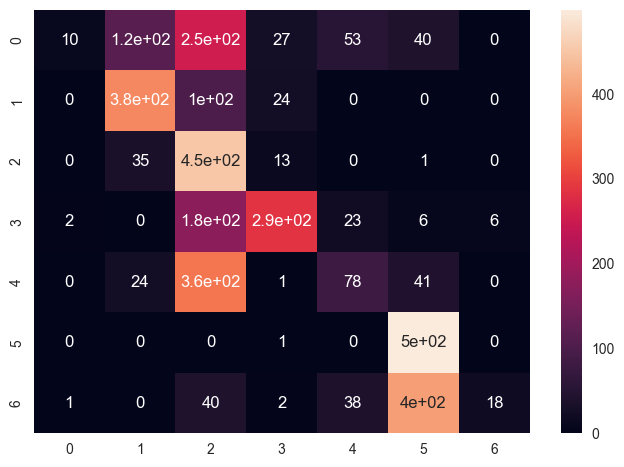

In [15]:
matrix = confusion_matrix(result_best_model['Consumer_type'], result_best_model['prediction_label'])
sns.heatmap(matrix, annot=True)

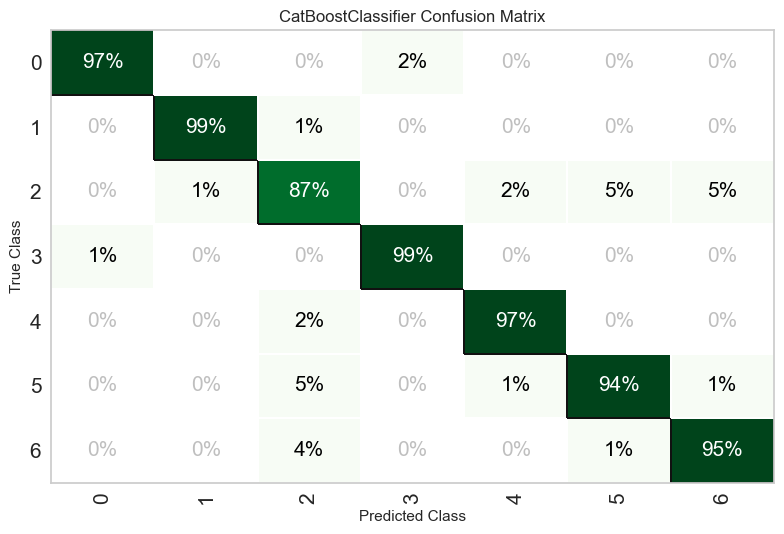

In [16]:
plot_model(best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [17]:
# tuned_best_model = tune_model(best_model)

In [18]:
# plot_model(tuned_best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [19]:
# result_tuned_best_model = predict_model(tuned_best_model, data=test)

In [20]:
# matrix = confusion_matrix(result_tuned_best_model['Consumer_type'], result_tuned_best_model['prediction_label'])
# sns.heatmap(matrix, annot=True)

In [21]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
# evaluate_model(tuned_best_model)

In [35]:
save_model(best_model, 'model_v2')
# save_model(tuned_best_model, 'tuned_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Year', 'Month', 'Consumption'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_valu...
                                     include=['Consumer_number',
                                              'Installation_zone'],
                                     transformer=TargetEncode

In [25]:
competition = pd.read_csv("competition.csv")

In [26]:
competition.head()

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3


In [27]:
result_competition = predict_model(best_model, data=competition)

result_competition = result_competition.rename(columns={'prediction_label': 'Consumer_type'})
result_competition = result_competition.drop('prediction_score', axis=1)


In [28]:
result_competition.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type,prediction_score
0,2013,1,1,VENX08444954462680,Installation_zone 1,industrial,0.7371
1,2013,1,2,GRXC33020746550125,Installation_zone 1,industrial,0.6439
2,2013,1,1,FCGQ19814303536339,Installation_zone 1,industrial,0.7371
3,2013,1,5,EQKL85694875580467,Installation_zone 3,industrial,0.4927
4,2013,1,14,KCXW91343862250032,Installation_zone 3,industrial,0.5253


Text(0.5, 1.0, 'Count of Consumer_type')

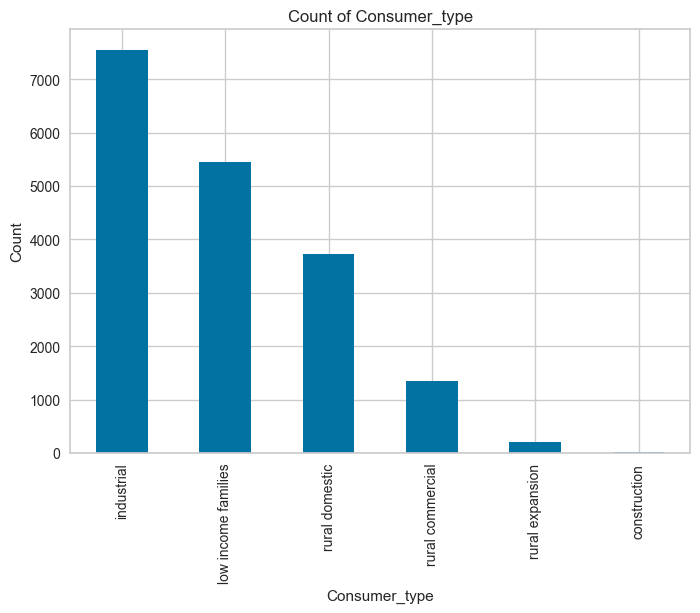

In [29]:
result_competition['Consumer_type'].value_counts().plot(kind='bar')

plt.xlabel('Consumer_type')
plt.ylabel('Count')
plt.title('Count of Consumer_type')

In [34]:
result_competition.to_csv('competition_v2.csv', index=False)

In [31]:
# result_competition = predict_model(tuned_best_model, data=competition)

# result_competition = result_competition.rename(columns={'prediction_label': 'Consumer_type'})

In [32]:
# result_competition.head()

In [33]:
# result_competition['Consumer_type'].value_counts().plot(kind='bar')

# plt.xlabel('Consumer_type')
# plt.ylabel('Count')
# plt.title('Count of Consumer_type')